# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Just HODL! Bitcoin and Ethereum outperform ‘lower risk’ crypto index funds.  Data from Delphi Digital shows holding BTC and ETH was more profitable than investing in weighted average market cap crypto and DeFi index funds. ... [| Skaityti daugiau](https://cointelegraph.com/news/just-hodl-bitcoin-and-ethereum-outperform-lower-risk-crypto-index-funds) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Unvaccinated U.S. swimmer sparks debate as Olympics start | CBC Sports.  A debate is brewing between former gold medallist Maya DiRado and some American swimmers over U.S. medal threat Michael Andrew's decision not to be vaccinated against the COVID-19 virus before heading to the Tokyo Olympics. ... [| Skaityti daugiau](http://www.cbc.ca/sports/olympics/summer/aquatics/swimming/unvaccinated-us-swimmer-sparks-debate-1.6114173) 

### Kainų kaita pandemijos metu

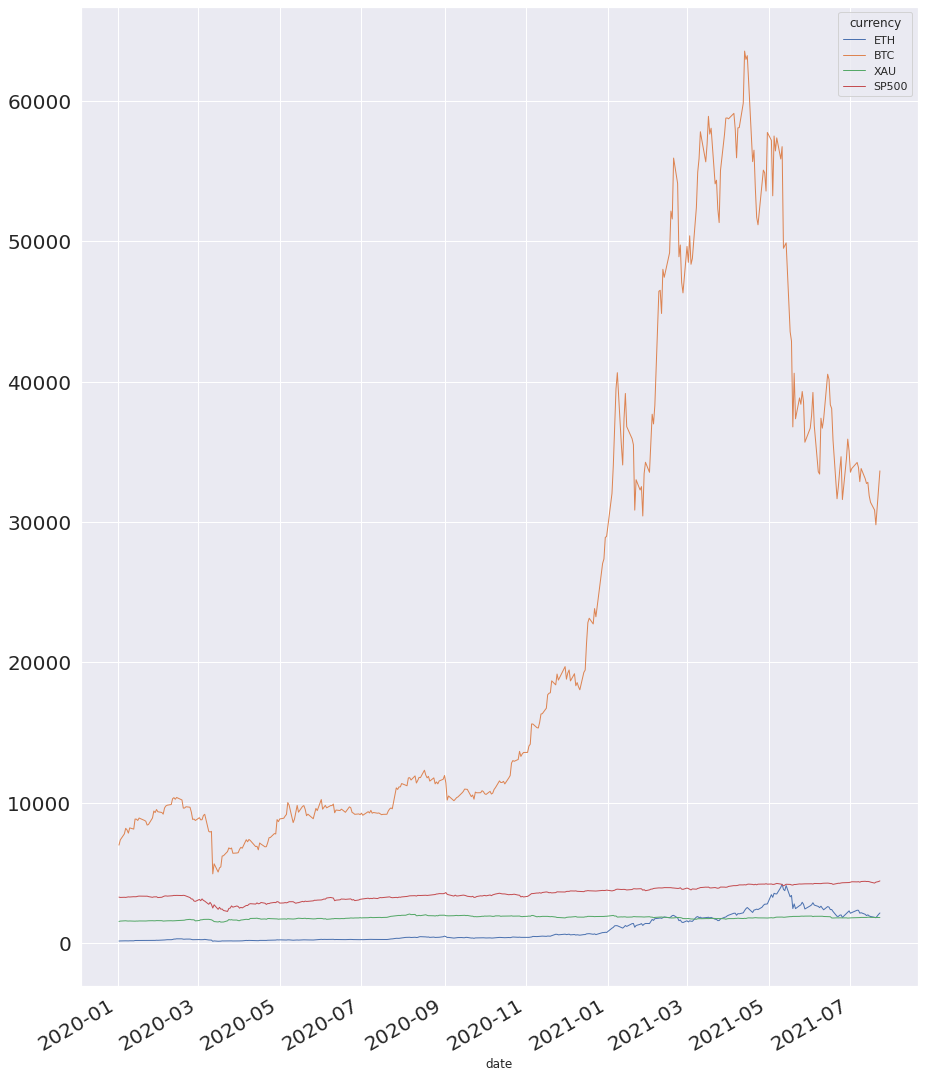

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.889380,0.208860,0.854533
BTC,0.889380,1.000000,0.141993,0.821049
XAU,0.208860,0.141993,1.000000,0.388229
SP500,0.854533,0.821049,0.388229,1.000000


In [8]:
#hide ### Koreliacijos matrica.

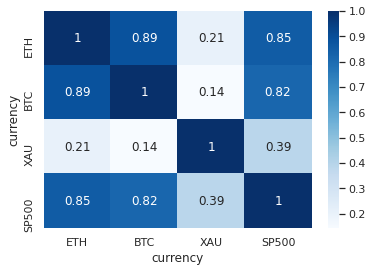

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')